## 2D FDTD
- 「FDTD法による電磁界およびアンテナ解析」を参照

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

from tqdm import tqdm 
%matplotlib inline

plt.style.use("dark_background")

In [2]:
# setup()

t = 0
dt = 1e-4
nt= 1e3

ndim = 2
Nx = Ny = 200
dx = dy = 1

# TM wave
e_field = np.ones((Nx, Ny, 1)) # only z direction
h_field = np.zeros((Nx, Ny, 2)) # x and y direction



    

In [3]:
conductivity = 1 * np.ones((Nx, Ny, 1))
permittivity = 1 * np.ones((Nx, Ny, 1))
permeability = np.ones((Nx, Ny, 1))

coeff1 = conductivity * dt / (2 * permittivity)
c_ez = (1 - coeff1) / (1 + coeff1) 
c_ezlx = dt/(permittivity * dx * (1 + coeff1))
c_ezly = dt/(permittivity * dy * (1 + coeff1))

c_hxlx = dt/(permeability * dx)
c_hxly = dt/(permeability * dy)

    
    

In [4]:
permittivity_of_vacuum = 8.85419e-12
permeability_of_vacuum = 1.25664e-06

In [5]:
c = 1/ np.sqrt( permeability_of_vacuum * permittivity_of_vacuum)
1/(np.sqrt((1/dx)**2 + (1/dy)**2)) >c * dt

False

In [6]:
1/(np.sqrt((1/dx)**2 + (1/dy)**2)) >c * dt

False

In [7]:
%%time
# set 
t = 0
dt = 1e-8
nt= 1e2

ndim = 2
Nx = Ny = 50
dx = dy = 20 # when wave length is 1.5e6



# set field properties
conductivity = 0 * np.ones((Nx, Ny, 1))
permittivity = permittivity_of_vacuum * np.ones((Nx, Ny, 1))
permeability = permeability_of_vacuum * np.ones((Nx, Ny, 1))

coeff1 = conductivity * dt / (2 * permittivity)
c_ez = (1 - coeff1) / (1 + coeff1) 
c_ezlx = dt/(permittivity * dx * (1 + coeff1))
c_ezly = dt/(permittivity * dy * (1 + coeff1))

c_hxlx = dt/(permeability * dx)
c_hxly = dt/(permeability * dy)

e_field = np.zeros((Nx, Ny, 1)) # only z direction
h_field = np.zeros((Nx, Ny, 2)) # x and y direction

# set excitation properties
ex_x = int(Nx / 2)
ex_y = int(Ny / 2)
t_arr  = np.arange(nt) * dt
f = 2 * 1e5
ez_val = 10 * np.sin(2 * np.pi * f * t_arr)
ez_result = np.zeros((t_arr.shape[0], Nx, Ny, 1))

for k, ex_ez in enumerate(ez_val):
    # excitation
    e_field[ex_x, ex_y] = ex_ez
    ez_result[k] = e_field
    # calc Ez
    for i  in range(1,Nx):
        for j  in range(1,Ny):
            e_field[i, j] = c_ez[i, j] * e_field[i,j] + c_ezly[i,j]*(h_field[i,j,0] - h_field[i,j-1,0])  \
            + c_ezlx[i,j]*(h_field[i,j,1] - h_field[i-1,j,1])
    # e_field
    # print(e_field[ex_x-1:ex_x+2,ex_y-1:ex_y+2])
    # calc Hx
    for i  in range(0, Nx):
        for j  in range(0, Ny - 1):
            h_field[i,  j, 0] = h_field[i,  j, 0] - c_hxly[i, j] * (e_field[i, j+1] - e_field[i, j])
    # calc Hy
    for i  in range(0, Nx - 1):
        for j  in range(0, Ny):
            h_field[i,  j, 1] = h_field[i,  j, 1] + c_hxlx[i, j] * (e_field[i+1, j] - e_field[i, j])
    #plt.plot(t_arr, ez_val)
print(np.sqrt(np.sum(e_field**2)))

87037762365.04868
CPU times: user 5.18 s, sys: 121 ms, total: 5.3 s
Wall time: 6.18 s


MovieWriter imagemagick unavailable.


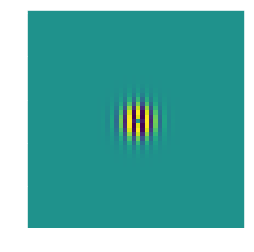

In [9]:
fig = plt.figure()
ims = []
res_len = ez_val.shape[0]

for k in range(res_len):
    im = plt.imshow(ez_result[k,:,:,0], animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
ani.save('anim0.gif', writer="imagemagick")
plt.show()

## numpy code

In [ ]:
# %%time
# set 
t = 0
dt = 1e-8
nt= 1e2

ndim = 2
Nx = Ny = 50
dx = dy = 20  # when wave length is 1.5e6

# set field properties
conductivity = 0 * np.ones((Nx, Ny, 1))
permittivity = permittivity_of_vacuum * np.ones((Nx, Ny, 1))
permeability = permeability_of_vacuum * np.ones((Nx, Ny, 1))

coeff1 = conductivity * dt / (2 * permittivity)
c_ez = (1 - coeff1) / (1 + coeff1) 
c_ezlx = dt/(permittivity * dx * (1 + coeff1))
c_ezly = dt/(permittivity * dy * (1 + coeff1))

c_hxlx = dt/(permeability * dx)
c_hxly = dt/(permeability * dy)

e_field = np.zeros((Nx, Ny, 1)) # only z direction
e_field_valid = np.zeros((Nx, Ny, 1)) # only z direction
h_field = np.zeros((Nx, Ny, 2)) # x and y direction
h_field_valid = np.zeros((Nx, Ny, 2)) # only z direction


# set excitation properties
ex_x = int(Nx / 2)
ex_y = int(Ny / 2)
t_arr  = np.arange(nt) * dt
f = 2 * 1e5
ez_val = 10 * np.sin(2 * np.pi * f * t_arr)
ez_result = np.zeros((t_arr.shape[0], Nx, Ny, 1))

for k, ex_ez in enumerate(ez_val):
    # excitation
    e_field_valid[ex_x, ex_y] = ex_ez
    e_field[ex_x, ex_y] = ex_ez
    ez_result[k] = e_field
    # calc Ez
    '''
    for i  in range(1,Nx):
        for j  in range(1,Ny):
            e_field_valid[i, j] = c_ez[i, j] * e_field_valid[i,j] + c_ezly[i,j]*(h_field[i,j,0] - h_field[i,j-1,0])  \
            + c_ezlx[i,j]*(h_field[i,j,1] - h_field[i-1,j,1])
    '''
    e_field[1:, 1:, 0] = (c_ez[1:, 1:, 0] * e_field[1:, 1:, 0]) + c_ezly[1:, 1:, 0] * (h_field[1:, 1:, 0] - h_field[1:, :Ny-1, 0]) \
        + c_ezlx[1:, 1:, 0] * (h_field[1:, 1:, 1] - h_field[:Nx-1, 1:, 1])    

    # calc Hx
    for i  in range(0, Nx):
        for j  in range(0, Ny - 1):
            h_field_valid[i,  j, 0] = h_field_valid[i,  j, 0] - c_hxly[i, j] * (e_field_valid[i, j+1] - e_field_valid[i, j])

    h_field[:, :Ny-1, 0] = h_field[:, :Ny-1, 0] - c_hxly[:, :Ny-1,0] * (e_field[:, 1:, 0] - e_field[:, :Ny-1, 0])
    # calc Hy
    '''
    for i  in range(0, Nx - 1):
        for j  in range(0, Ny):
            h_field[i,  j, 1] = h_field[i,  j, 1] + c_hxlx[i, j] * (e_field[i+1, j] - e_field[i, j])
    '''
    h_field[:Nx-1, :, 1] -= c_hxlx[:Nx-1, :, 0] * (e_field[1:, :, 0] - e_field[:Nx-1, :, 0])
    #plt.plot(t_arr, ez_val)
    
    print("nt:{}, e_dif:{}, h_dif:{}".format(k, np.average(e_field_valid - e_field), np.average(h_field_valid - h_field)))
print(np.sqrt(np.sum(e_field**2)))

In [ ]:
# set 
t = 0
dt = 1e-8
nt= 100

ndim = 2
Nx = Ny = 20
dx = dy = 20 # when wave length is 1.5e6

# set field properties
conductivity = 0 * np.ones((Nx, Ny, 1))
permittivity = permittivity_of_vacuum * np.ones((Nx, Ny, 1))
permeability = permeability_of_vacuum * np.ones((Nx, Ny, 1))

coeff1 = conductivity * dt / (2 * permittivity)
c_ez = (1 - coeff1) / (1 + coeff1) 
c_ezlx = dt/(permittivity * dx * (1 + coeff1))
c_ezly = dt/(permittivity * dy * (1 + coeff1))

c_hxlx = dt/(permeability * dx)
c_hxly = dt/(permeability * dy)

e_field = np.zeros((Nx, Ny, 1)) # only z direction
e_field_valid = np.zeros((Nx, Ny, 1)) # only z direction
h_field = np.zeros((Nx, Ny, 2)) # x and y direction
h_field_valid = np.zeros((Nx, Ny, 2)) # only z direction


# set excitation properties
ex_x = int(Nx / 2)
ex_y = int(Ny / 2)
t_arr  = np.arange(nt) * dt
f = 2 * 1e5
ez_val = 10 * np.sin(2 * np.pi * f * t_arr)
ez_result = np.zeros((t_arr.shape[0], Nx, Ny, 1))

for k, ex_ez in enumerate(ez_val):
    # excitation
    e_field_valid[ex_x, ex_y] = ex_ez
    e_field[ex_x, ex_y] = ex_ez
    ez_result[k] = e_field
    # calc Ez
    '''
    for i  in range(1,Nx):
        for j  in range(1,Ny):
            e_field_valid[i, j] = c_ez[i, j] * e_field_valid[i,j] + c_ezly[i,j]*(h_field[i,j,0] - h_field[i,j-1,0])  \
            + c_ezlx[i,j]*(h_field[i,j,1] - h_field[i-1,j,1])
    '''
    e_field[1:, 1:, 0] = (c_ez[1:, 1:, 0] * e_field[1:, 1:, 0]) + c_ezly[1:, 1:, 0] * (h_field[1:, 1:, 0] - h_field[1:, :Ny-1, 0]) \
        + c_ezlx[1:, 1:, 0] * (h_field[1:, 1:, 1] - h_field[:Nx-1, 1:, 1])    

    # calc Hx
    '''
    
    for i  in range(0, Nx):
        for j  in range(0, Ny - 1):
            h_field_valid[i,  j, 0] = h_field_valid[i,  j, 0] - c_hxly[i, j] * (e_field_valid[i, j+1] - e_field_valid[i, j])
    '''
    h_field[:, :Ny-1, 0] -= h_field[:, :Ny-1, 0] - c_hxly[:, :Ny-1,0] * (e_field[:, 1:, 0] - e_field[:, :Ny-1, 0])
    # calc Hy
    '''
    for i  in range(0, Nx - 1):
        for j  in range(0, Ny):
            h_field[i,  j, 1] = h_field[i,  j, 1] + c_hxlx[i, j] * (e_field[i+1, j] - e_field[i, j])
    '''
    h_field[:Nx-1, :, 1] -= c_hxlx[:Nx-1, :, 0] * (e_field[1:, :, 0] - e_field[:Nx-1, :, 0])
    #plt.plot(t_arr, ez_val)
    
    print("nt:{}, e_dif:{}, h_dif:{}".format(k, np.average(e_field_valid - e_field), np.average(h_field_valid - h_field)))
print(np.sqrt(np.sum(e_field**2)))

In [ ]:
fig = plt.figure()
ims = []
res_len = ez_val.shape[0]

for k in range(res_len):
    im = plt.imshow(ez_result[k,:,:,0], animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
ani.save('anim1.gif', writer="imagemagick")
plt.show()

In [ ]:
def update_h(e_field, h_field):
    Nx = e_field.shape[0]
    Ny = e_field.shape[1]
    h_field_next = np.zeros_like(h_field)
    for i in range(0, Nx):
        for j in range(0, Ny-1):
            h_field_next[i,  j, 0] = h_field[i,  j, 0] - c_hxly[i, j] * (e_field[i, j+1] - e_field[i, j])
    return h_field_next

def update_h_np(e_field, h_field):
    h_field[:, :Ny-1, 0] = h_field[:, :Ny-1, 0] - c_hxly[:, :Ny-1,0] * (e_field[:, 1:, 0] - e_field[:, :Ny-1, 0])
    return h_field

In [ ]:
h_field_next_np = update_h_np(e_field, h_field)

In [ ]:
update_h(e_field, h_field)[:,:,1] - update_h_np(e_field, h_field)[:,:,1]

In [ ]:
print(np.average(update_h(e_field, h_field) - update_h_np(e_field, h_field)))

h_field_next = update_h(e_field, h_field)
h_field_next_np = update_h_np(e_field, h_field)
for i in range(0, Nx):
        for j in range(0, Ny-1):
            valid_val = h_field[i,  j, 0] - c_hxly[i, j] * (e_field[i, j+1] - e_field[i, j])
            print("valid is {}, np is {}, diff is {}".format(h_field_next[i,j,0], h_field_next_np[i,j,0], h_field_next[i,j,0] - h_field_next_np[i,j,0]))

In [ ]:
print(np.average(update_h(e_field, h_field) - update_h_np(e_field, h_field)))

h_field_next[:, :Ny-1, 0] = h_field[:, :Ny-1, 0] - c_hxly[:, :Ny-1,0] * (e_field[:, 1:, 0] - e_field[:, :Ny-1, 0])
for i in range(0, Nx):
        for j in range(0, Ny-1):
            valid_val = h_field[i,  j, 0] - c_hxly[i, j] * (e_field[i, j+1] - e_field[i, j])
            print("valid is {}, np is {}, diff is {}".format(valid_val, h_field_next[i,j,0], valid_val - h_field_next[i,j,0]))
            

In [ ]:
h_field_valid_next = np.ones_like(h_field_valid)
h_field_next =  np.ones_like(h_field)

for i  in range(0, Nx):
        for j  in range(0, Ny - 1):
            # if i ==1 and j == 1:
                # print(h_field[i,  j, 0], c_hxly[i, j] , e_field[i,j+1], e_field[i,j])
            h_field_valid_next[i,  j, 0] = h_field[i,  j, 0] - c_hxly[i, j] * (e_field[i, j+1] - e_field[i, j])
            # print(h_field[i,  j, 0], c_hxly[i, j] , e_field[i, j+1] , e_field[i, j])
            print(h_field[i,  j, 0],  c_hxly[i, j] * (e_field[i, j+1] - e_field[i, j]))
h_field_next[:, :Ny-1, 0] = h_field[:, :Ny-1, 0] - c_hxly[:, :Ny-1,0] * (e_field[:, 1:, 0] - e_field[:, :Ny-1, 0])

In [ ]:
h_field[:, :Ny-1, 0] - c_hxly[:, :Ny-1,0] * (e_field[:, 1:, 0] - e_field[:, :Ny-1, 0])

In [ ]:
h_field_next

In [ ]:
h_field_valid_next

In [ ]:
(h_field_next - h_field_valid_next)[:,:,0]

In [ ]:
print(np.average(e_field) / np.average(e_field_valid))
print(np.average(h_field) / np.average(h_field_valid))

In [ ]:
fig = plt.figure()
ims = []
res_len = ez_val.shape[0]

for k in range(res_len):
    im = plt.imshow(ez_result[k,:,:,0], animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
ani.save('anim1.gif', writer="imagemagick")
plt.show()

In [ ]:
 h_field[:Nx-1, :, 1] - c_hxlx[:Nx-1, :, 0] * (e_field[1:, :, 0] - e_field[:Nx-1, :, 0])

In [ ]:
e_field[1:, :, 1] 

In [ ]:
 e_field[1:, 1:, 0] = (c_ez[1:, 1:, 0] * e_field[1:, 1:, 0]) + c_ezly[1:, 1:, 0] * (h_field[1:, 1:, 0] - h_field[:-1, :-1, 0]) \
        + c_ezlx[1:, 1:, 0] * (h_field[1:, 1:, 1] - h_field[:-1, :-1, 1])

In [ ]:
res = c_ezly[1:, 1:, 0] * (h_field[1:, 1:, 0] - h_field[:-1, :-1, 0])
(c_ezlx[1:, 1:, 0] * (h_field[1:, 1:, 1] - h_field[:-1, :-1, 1])).shape

In [ ]:
print(c_ez.shape, e_field.shape)

In [ ]:
e_field.shape

In [ ]:
(c_ezly[1:, 1:, 0] * (h_field[1:, 1:, 0] - h_field[:-1, :-1, 0])).shape

In [ ]:
e_field[1:, 1:] = c_ez[1:, 1:] * e_field[1:, 1:] + c_ezly[1:, 1:, 0] * (h_field[1:, 1:, 0] - h_field[:-1, :-1, 0]) \
+ c_ezlx[1:, 1:, 0] * (h_field[1:, 1:, 1] - h_field[:-1, :-1, 1])

In [ ]:
c_ezlx.shape, h_field.shape

In [ ]:
(c_ezly[1:, 1:, 0] * (h_field[1:, 1:, 0] - h_field[:-1, :-1, 0]) ).shape

In [ ]:
res = (c_ez[1:, 1:] * e_field[1:, 1:])[0] + c_ezly[1:, 1:, 0] * (h_field[1:, 1:, 0] - h_field[:-1, :-1, 0]) \
+ c_ezlx[1:, 1:, 0] * (h_field[1:, 1:, 1] - h_field[:-1, :-1, 1])
res.shape

In [ ]:


fig = plt.figure()
ims = []
res_len = ez_val.shape[0]

for k in range(res_len):
    im = plt.imshow(ez_result[k,:,:,0], animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
ani.save('anim.gif', writer="imagemagick")
plt.show()

In [ ]:
"https://qiita.com/msrks/items/e264872efa062c7d6955"

In [ ]:
fig = plt.figure()
ims = []
res_len = ez_val.shape[0]

for k in range(res_len):
    im = plt.imshow(ez_result[k,:,:,0], animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
ani.save('anim.gif', writer="imagemagick")
plt.show()